In [1]:
import sys
print(sys.executable)
sys.path.append('/Users/sachaizadi/Documents/Projets/stack_under_flow/')

import json
import numpy as np
from stack_under_flow.model.preprocessing import Preprocessor
%matplotlib inline
import matplotlib.pyplot as plt

/Users/sachaizadi/Documents/Projets/stack_under_flow/venv/bin/python


In [2]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

In [3]:
def extract_text(tag: str):
    with open(
            f"/Users/sachaizadi/Documents/Projets/stack_under_flow/stack_under_flow/data/data_{tag}.json",
            "r") as f:
        json_data = json.loads(f.read())

    return [data.get("answer_body") for data in json_data if data.get("answer_body") is not None]

full_text = []
for tag in [
    "anaconda", "git", "gensim", "nltk", "pycharm", "jupyter", "keras",
    "matplotlib", "numpy", "python", "pytorch", "tensorflow", "django",
    "flask", "docker", "selenium"
]:
    full_text.extend(extract_text(tag))

In [4]:
preprocessor = Preprocessor(
    word2vec_model_src="/Users/sachaizadi/Documents/Projets/stack_under_flow/stack_under_flow/model/word2vec.model"
)

In [5]:
X = preprocessor.transform(full_text)

In [6]:
to_remove = []
for i in range(len(X)):
    try :
        X[i].shape[1]
    except:
        to_remove.append(i)

print(len(to_remove))

13


In [7]:
X = np.vstack([X[i] for i in range(len(X)) if i not in to_remove])

In [8]:
tokens = preprocessor.transform(full_text, vectorize=False)

tokens = tokens.tolist()
tokens = [tokens[i] for i in range(len(tokens)) if i not in to_remove]
tokens = [t[i] for t in tokens for i in range(len(t))]

In [9]:
len(tokens) == X.shape[0]

True

In [10]:
from sklearn.manifold import TSNE

In [11]:
tsne = TSNE().fit_transform(X)

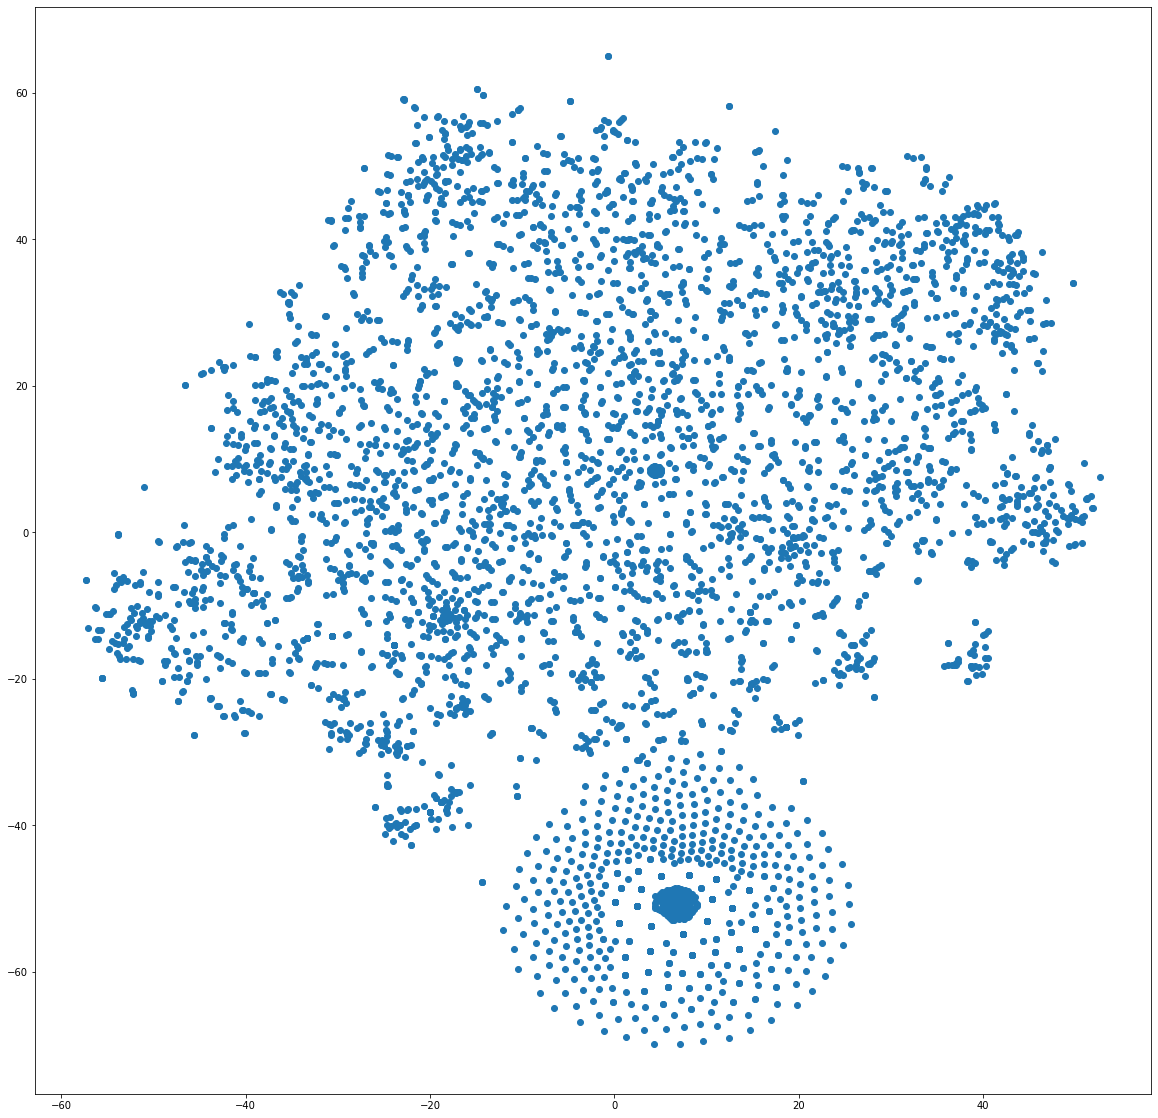

In [12]:
plt.figure(figsize=(20,20))
plt.plot(tsne.T[0], tsne.T[1],'o')

In [13]:
def get_most_similar_words(sentence):
    similar_words = preprocessor.word2vec_model.wv.most_similar(positive=[sentence], topn=10)
    return [similar_word[0] for similar_word in similar_words]

most_similar_words_preprocessed_sentences = [
    (i, get_most_similar_words(X[i])) for i in range(X.shape[0])
]

In [14]:
trace0 = go.Scatter(
    x = tsne[:,0],
    y = tsne[:,1],
    mode = 'markers',
    showlegend = False,
    text=most_similar_words_preprocessed_sentences, #TODO: change this
    marker = dict(
        size = 8,
        colorscale ='Jet',
        showscale = False,
        line = dict(
            width = 2,
            color = 'rgb(255, 255, 255)'
        ),
        opacity = 0.8
    )
)
data = [trace0]

layout = dict(title = 'TSNE Exploration',
              hovermode= 'closest',
              yaxis = dict(zeroline = False),
              xaxis = dict(zeroline = False),
              showlegend= True
             )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-scatter')

In [15]:
tokens[4188]

['$longcode$']

In [16]:
filtered_tokens = [tokens[i] for i in range(len(tokens)) if tokens[i]!=["$longcode$"]]
filtered_X = np.vstack([X[i] for i in range(X.shape[0]) if tokens[i]!=["$longcode$"]])

In [17]:
len(filtered_tokens) == filtered_X.shape[0]

True

In [18]:
filtered_tsne = TSNE().fit_transform(filtered_X)

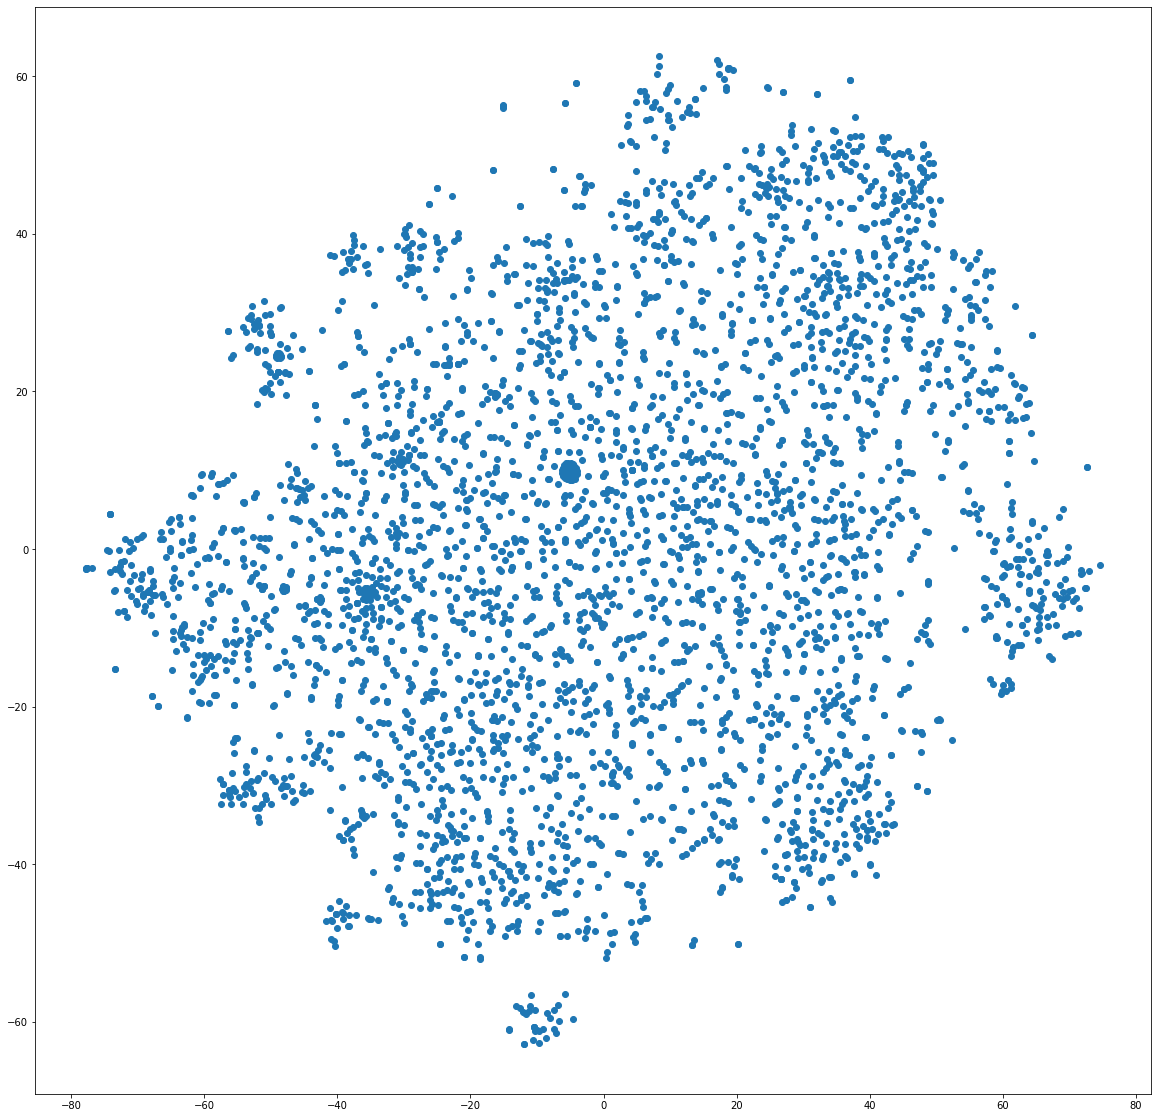

In [19]:
plt.figure(figsize=(20,20))
plt.plot(filtered_tsne.T[0], filtered_tsne.T[1],'o')

In [20]:
most_similar_words_preprocessed_sentences_filtered = [
    (i, get_most_similar_words(filtered_X[i])) for i in range(filtered_X.shape[0])
]

In [21]:
trace0 = go.Scatter(
    x = filtered_tsne[:,0],
    y = filtered_tsne[:,1],
    mode = 'markers',
    showlegend = False,
    text=most_similar_words_preprocessed_sentences_filtered, #TODO: change this
    marker = dict(
        size = 8,
        colorscale ='Jet',
        showscale = False,
        line = dict(
            width = 2,
            color = 'rgb(255, 255, 255)'
        ),
        opacity = 0.8
    )
)
data = [trace0]

layout = dict(title = 'TSNE Exploration',
              hovermode= 'closest',
              yaxis = dict(zeroline = False),
              xaxis = dict(zeroline = False),
              showlegend= True
             )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-scatter')

In [22]:
from sklearn.cluster import KMeans

In [35]:
kmeans = KMeans(n_clusters=10)
clusters = kmeans.fit_predict(filtered_tsne)

In [36]:
trace0 = go.Scatter(
    x = filtered_tsne[:,0],
    y = filtered_tsne[:,1],
    mode = 'markers',
    showlegend = False,
    text=most_similar_words_preprocessed_sentences_filtered, #TODO: change this
    marker = dict(
        size = 8,
        colorscale ='Jet',
        showscale = False,
        color = clusters,
        line = dict(
            width = 2,
            color = 'rgb(255, 255, 255)'
        ),
        opacity = 0.8
    )
)
data = [trace0]

layout = dict(title = 'TSNE Exploration',
              hovermode= 'closest',
              yaxis = dict(zeroline = False),
              xaxis = dict(zeroline = False),
              showlegend= True
             )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-scatter')